## Forcasting Stock Performance in Our Traditional Energy Stocks Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.


### Import Dependencies

In [2]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 10 Year's Worth of Traditional Energy Stock Price Data via Alpaca API Call

In [5]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2010-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ['BP', 'COP', 'CVX', 'EQNR', 'OKE', 'PXD', 'XOM']

# Get 10 year's worth of historical price data
trad_energy = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
trad_energy.head()

BP                                        COP  \
                            open     high      low    close   volume   open   
time                                                                          
2019-08-09 00:00:00-04:00  36.93  37.1100  36.7500  36.8100  6573170  54.96   
2019-08-12 00:00:00-04:00  36.86  36.9400  36.5800  36.6700  5532312  53.79   
2019-08-13 00:00:00-04:00  36.60  37.3400  36.5200  37.2000  9266687  52.84   
2019-08-14 00:00:00-04:00  36.42  36.5348  36.1500  36.2501  9905228  52.46   
2019-08-15 00:00:00-04:00  35.92  36.0900  35.7251  36.0500  8085528  51.40   

                                                         ...     PXD           \
                            high    low  close   volume  ...    open     high   
time                                                     ...                    
2019-08-09 00:00:00-04:00  55.47  53.98  54.01  4261194  ...  126.00  127.885   
2019-08-12 00:00:00-04:00  53.93  52.85  53.12  3227790  ...  125.39  127.780   
2019-08-13 00:00:00-04:00  54.83  52.44  53.87  5261949  ...  125.56  129.570   
2019-08-14 00:00:00-04:00  52.86  51.52  51.79  5289817  ...  125.34  126.370   
2019-08-15 00:00:00-04:00  52.01  50.59  50.91  5340355  ...  122.56  123.650   

                                                      XOM                  \
                              low   close   volume   open    high     low   
time                                                                        
2019-08-09 00:00:00-04:00  124.86  126.24  1240740  72.13  72.250  70.470   
2019-08-12 00:00:00-04:00  124.21  126.79  1426932  70.06  70.160  69.330   
2019-08-13 00:00:00-04:00  125.08  128.38  1560585  69.27  70.620  68.920   
2019-08-14 00:00:00-04:00  122.50  122.72  1641303  69.07  69.090  67.650   
2019-08-15 00:00:00-04:00  120.93  122.97  1060414  67.46  67.555  66.525   

                                            
                           close    volume  
time                                        
2019-08-09 00:00:00-04:00  70.84  11314943  
2019-08-12 00:00:00-04:00  69.61   7976201  
2019-08-13 00:00:00-04:00  70.48  10164978  
2019-08-14 00:00:00-04:00  67.66  14897131  
2019-08-15 00:00:00-04:00  67.25  10962122  

[5 rows x 35 columns]

### The MCForecastTools Library at a Glance

In [6]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

### Simulate 10 year portfolio growth using Monte Carlo simulation

In [7]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns WEIGHTED BY Market Capital
TE_MC_10_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [0.12, 0.10, 0.27, 0.09, 0.03, 0.05, 0.34],
    num_simulation = 100,
    num_trading_days = 252*10)

In [8]:
# Printing the simulation input data
TE_MC_10_years.portfolio_data

BP                                      \
                            open     high      low    close   volume   
time                                                                   
2019-08-09 00:00:00-04:00  36.93  37.1100  36.7500  36.8100  6573170   
2019-08-12 00:00:00-04:00  36.86  36.9400  36.5800  36.6700  5532312   
2019-08-13 00:00:00-04:00  36.60  37.3400  36.5200  37.2000  9266687   
2019-08-14 00:00:00-04:00  36.42  36.5348  36.1500  36.2501  9905228   
2019-08-15 00:00:00-04:00  35.92  36.0900  35.7251  36.0500  8085528   
...                          ...      ...      ...      ...      ...   
2019-12-24 00:00:00-05:00  37.97  38.1400  37.9600  38.0500  2200308   
2019-12-26 00:00:00-05:00  38.06  38.2000  37.9400  37.9800  4341802   
2019-12-27 00:00:00-05:00  38.24  38.2500  37.8700  37.8700  4932689   
2019-12-30 00:00:00-05:00  37.80  37.9680  37.5700  37.6000  5849015   
2019-12-31 00:00:00-05:00  37.42  37.7400  37.3301  37.7400  5083063   

                                          COP                         ...  \
                          daily_return   open     high    low  close  ...   
time                                                                  ...   
2019-08-09 00:00:00-04:00          NaN  54.96  55.4700  53.98  54.01  ...   
2019-08-12 00:00:00-04:00    -0.003803  53.79  53.9300  52.85  53.12  ...   
2019-08-13 00:00:00-04:00     0.014453  52.84  54.8300  52.44  53.87  ...   
2019-08-14 00:00:00-04:00    -0.025535  52.46  52.8600  51.52  51.79  ...   
2019-08-15 00:00:00-04:00    -0.005520  51.40  52.0100  50.59  50.91  ...   
...                                ...    ...      ...    ...    ...  ...   
2019-12-24 00:00:00-05:00    -0.001312  64.76  65.5100  64.61  64.71  ...   
2019-12-26 00:00:00-05:00    -0.001840  65.09  65.7359  64.85  65.03  ...   
2019-12-27 00:00:00-05:00    -0.002896  65.20  65.6300  64.61  65.01  ...   
2019-12-30 00:00:00-05:00    -0.007130  65.07  65.2500  64.53  64.62  ...   
2019-12-31 00:00:00-05:00     0.003723  64.15  65.1700  63.90  65.01  ...   

                              PXD                                  XOM  \
                              low   close   volume daily_return   open   
time                                                                     
2019-08-09 00:00:00-04:00  124.86  126.24  1240740          NaN  72.13   
2019-08-12 00:00:00-04:00  124.21  126.79  1426932     0.004357  70.06   
2019-08-13 00:00:00-04:00  125.08  128.38  1560585     0.012540  69.27   
2019-08-14 00:00:00-04:00  122.50  122.72  1641303    -0.044088  69.07   
2019-08-15 00:00:00-04:00  120.93  122.97  1060414     0.002037  67.46   
...                           ...     ...      ...          ...    ...   
2019-12-24 00:00:00-05:00  151.05  151.80   347823     0.005564  70.35   
2019-12-26 00:00:00-05:00  151.76  152.12   700815     0.002108  70.19   
2019-12-27 00:00:00-05:00  151.70  151.84   778671    -0.001841  70.20   
2019-12-30 00:00:00-05:00  150.25  150.87  1076110    -0.006388  70.09   
2019-12-31 00:00:00-05:00  149.16  151.33   834722     0.003049  69.02   

                                                                           
                              high      low  close    volume daily_return  
time                                                                       
2019-08-09 00:00:00-04:00  72.2500  70.4700  70.84  11314943          NaN  
2019-08-12 00:00:00-04:00  70.1600  69.3300  69.61   7976201    -0.017363  
2019-08-13 00:00:00-04:00  70.6200  68.9200  70.48  10164978     0.012498  
2019-08-14 00:00:00-04:00  69.0900  67.6500  67.66  14897131    -0.040011  
2019-08-15 00:00:00-04:00  67.5550  66.5250  67.25  10962122    -0.006060  
...                            ...      ...    ...       ...          ...  
2019-12-24 00:00:00-05:00  70.5000  69.9101  70.02   3650368    -0.003841  
2019-12-26 00:00:00-05:00  70.5000  70.0100  70.13   6831328     0.001571  
2019-12-27 00:00:00-05:00  70.3123  69.8800  69.89   7459006    -0.00

In [9]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
TE_MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993749,0.996865,0.994752,0.999445,0.998688,1.001913,0.996355,1.001914,1.011057,0.997527,...,1.008181,1.000516,0.990989,0.999446,1.012958,1.000334,1.005665,1.006942,1.005658,0.994296
2,0.993540,0.995176,0.993916,0.997236,1.008922,1.001126,0.992265,0.989299,1.015211,1.001504,...,1.008114,0.996205,0.987400,0.998183,1.019960,1.006500,0.998603,1.016346,1.013402,1.012566
3,0.996910,1.002957,0.994828,0.991080,1.008103,0.991685,0.992387,0.985292,1.025304,1.005156,...,1.007865,1.002509,0.988141,1.002541,1.019957,0.998239,0.986235,1.013465,1.013176,1.015392
4,0.995112,0.989772,0.991168,0.984893,0.996880,0.997221,0.993331,0.988061,1.034882,1.006107,...,1.013907,0.995106,0.992813,1.006234,1.022439,0.999627,0.990880,1.006502,1.019411,1.017551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.776342,3.428744,2.958571,2.463078,4.885718,3.884048,5.080130,3.632108,2.066177,4.777632,...,3.660386,3.809985,3.425549,3.475236,3.584641,2.428286,3.456911,3.918672,3.013854,3.730502
2517,3.761781,3.441672,2.973690,2.460847,4.923866,3.858783,5.083258,3.629697,2.070748,4.811602,...,3.665665,3.822054,3.380542,3.475411,3.606452,2.458771,3.497554,3.904082,3.007105,3.725397
2518,3.794247,3.424592,2.976413,2.471076,4.920732,3.874734,5.091387,3.624943,2.075015,4.844176,...,3.645876,3.789671,3.370849,3.488349,3.583778,2.449314,3.466836,3.859121,3.001753,3.729361
2519,3.767385,3.419234,2.957622,2.496878,4.926521,3.874115,5.104487,3.683655,2.083973,4.831585,...,3.656052,3.803158,3.385870,3.476486,3.586372,2.449643,3.453865,3.875536,2.981846,3.729782


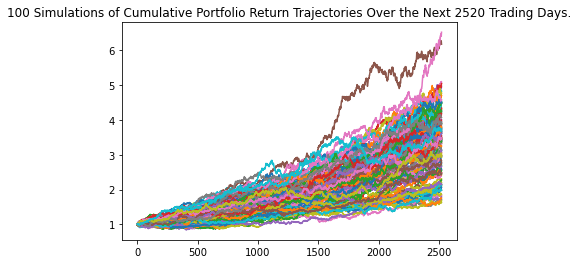

In [10]:
# Plot simulation outcomes
line_plot_TE_MC_10_years = TE_MC_10_years.plot_simulation()

# Save the plot for future usage
line_plot_TE_MC_10_years.get_figure().savefig("TE_MC_10_years_sim_plot.png", bbox_inches="tight")

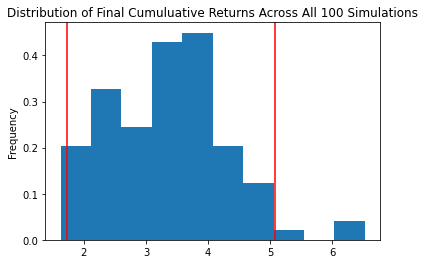

In [11]:
# Plot probability distribution and confidence intervals
dist_plot_TE_MC_10_years = TE_MC_10_years.plot_distribution()

# Save the plot for future usage
dist_plot_TE_MC_10_years.get_figure().savefig('TE_MC_10_years_dist_plot.png',bbox_inches='tight')

In [12]:
# Fetch summary statistics from the Monte Carlo simulation results
tblMC = TE_MC_10_years.summarize_cumulative_return()

# Print summary statistics
print(tblMC)

count           100.000000
mean              3.353422
std               0.968362
min               1.625220
25%               2.578747
50%               3.427855
75%               3.898385
max               6.522543
95% CI Lower      1.732575
95% CI Upper      5.068978
Name: 2520, dtype: float64


In [13]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_TE_MC_10_years_lower = round(tblMC[8]*10000,2)
ci_TE_MC_10_years_upper = round(tblMC[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_TE_MC_10_years_lower} and ${ci_TE_MC_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $17325.75 and $50689.78


#### WEIGHTED BY Dividend Yield

In [14]:
# Configuring a Monte Carlo simulation to forecast ten years cumulative returns WEIGHTED BY Dividend Yield
TE_DY_10_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [0.19, 0.10, 0.15, 0.09, 0.23, 0.05, 0.19],
    num_simulation = 100,
    num_trading_days = 252*10)

In [15]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
TE_DY_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003011,0.997909,0.996509,0.998201,1.001760,0.998724,1.008649,1.004294,1.011301,1.002295,...,1.004839,1.010000,0.995737,1.001875,1.002485,0.997938,1.006925,1.000924,0.997924,1.000383
2,1.006829,0.998417,0.986061,1.001643,1.002424,0.999312,1.020166,1.005498,1.018367,0.998327,...,1.002015,1.013045,0.999845,1.007589,1.008878,0.996568,1.007172,1.000106,0.994015,0.996474
3,1.003256,1.000966,0.988340,1.000571,0.999754,0.995763,1.025341,1.004478,1.025167,0.999651,...,0.999323,1.006689,1.009748,1.007273,1.008285,0.998608,1.010793,0.997823,0.994306,0.995053
4,1.009127,0.997769,0.990418,1.001725,0.995578,1.002411,1.021978,1.009123,1.039169,0.997056,...,1.002723,1.001782,1.000758,1.005727,1.011871,1.002686,1.010359,0.992153,0.990972,0.994826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.706840,7.943953,9.174389,5.238243,4.448747,6.140499,6.477083,6.325390,3.635645,7.533838,...,6.887114,7.121385,7.664782,4.998746,10.573781,5.273632,7.641318,9.189154,7.816081,6.357579
2517,5.719934,7.915678,9.181374,5.215802,4.440658,6.177643,6.437334,6.355772,3.612274,7.518091,...,6.886760,7.155745,7.654693,5.020917,10.560370,5.247114,7.625417,9.235447,7.845394,6.335149
2518,5.730631,7.882505,9.232262,5.245307,4.496747,6.176678,6.420864,6.343341,3.617461,7.501036,...,6.909153,7.205107,7.662667,4.998073,10.629874,5.275501,7.632065,9.368698,7.846538,6.296883
2519,5.757840,7.898226,9.225953,5.275929,4.459671,6.144502,6.462785,6.373455,3.630528,7.490990,...,6.935227,7.211835,7.648121,4.999933,10.654369,5.275947,7.640183,9.295302,7.834767,6.306710


In [16]:
# Fetch summary statistics from the Monte Carlo simulation results
tblDY = TE_DY_10_years.summarize_cumulative_return()

# Print summary statistics
print(tblDY)

count           100.000000
mean              6.231656
std               1.724029
min               3.540285
25%               4.892218
50%               6.022534
75%               7.190902
max              11.826261
95% CI Lower      3.674806
95% CI Upper     10.402153
Name: 2520, dtype: float64


In [17]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_TE_DY_10_years_lower = round(tblDY[8]*10000,2)
ci_TE_DY_10_years_upper = round(tblDY[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_TE_DY_10_years_lower} and ${ci_TE_DY_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $36748.06 and $104021.53


#### WEIGHTED BY 10 years Return

In [18]:
# Configuring a Monte Carlo simulation to forecast ten years cumulative returns WEIGHTED BY 10 years Return
TE_Ret_10_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [0.06, 0.13, 0.12, 0.06, 0.31, 0.24, 0.08],
    num_simulation = 100,
    num_trading_days = 252*10)

In [19]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
TE_Ret_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994818,0.999994,0.994432,1.001398,0.996407,1.004756,1.004404,1.005475,0.997338,0.997801,...,1.012133,1.014111,0.996071,1.001704,1.000893,1.005572,1.009590,1.001458,1.003120,1.006647
2,1.001731,1.000235,0.999579,1.002319,1.003138,1.012895,0.998184,1.017659,1.006337,0.993763,...,1.000959,1.020709,0.998493,1.010013,0.999479,1.008276,1.024862,0.992361,1.003685,0.999731
3,1.006083,1.008133,0.995297,1.002584,1.015786,1.011192,0.993237,1.034658,1.009541,0.991859,...,1.003602,1.017705,1.002383,1.006460,0.998859,1.019355,1.024758,1.003751,1.010575,0.995407
4,1.015510,1.011200,0.995640,1.017186,1.017196,1.001884,0.985965,1.046124,1.007089,0.986443,...,1.002791,1.016510,0.990358,1.014749,1.009192,1.012886,1.032172,0.993901,1.016462,0.992994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,16.962268,18.787619,22.808936,15.517003,23.850526,22.776186,23.071955,23.488515,12.999809,16.449318,...,12.703787,19.461443,13.637999,44.862030,19.015275,19.196788,15.580129,17.910609,11.777313,27.089506
2517,16.978211,18.647720,23.078734,15.346314,24.082412,22.902765,22.819306,23.349739,13.046509,16.552322,...,12.675705,19.505627,13.579012,45.092530,18.967794,19.085277,15.479934,17.812363,11.863393,26.859789
2518,17.114389,18.363562,22.721716,15.229821,23.975140,22.954038,22.800768,23.604309,13.019226,16.678198,...,12.774982,19.415367,13.561318,45.488593,19.051093,19.345426,15.690111,17.800442,12.063155,26.536080
2519,17.099393,18.502630,23.046844,15.437733,23.775518,23.182253,22.598352,23.524523,13.205154,16.633074,...,12.737184,19.240957,13.576885,45.788290,19.100187,19.394639,15.760722,17.884051,12.013293,26.280674


In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
tblRet = TE_Ret_10_years.summarize_cumulative_return()

# Print summary statistics
print(tblRet)

count           100.000000
mean             20.658137
std               8.073960
min               7.350498
25%              15.324769
50%              19.097466
75%              24.935772
max              57.835587
95% CI Lower      8.361110
95% CI Upper     38.025736
Name: 2520, dtype: float64


In [21]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_TE_Ret_10_years_lower = round(tblRet[8]*10000,2)
ci_TE_Ret_10_years_upper = round(tblRet[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_TE_Ret_10_years_lower} and ${ci_TE_Ret_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $83611.1 and $380257.36


## ---------------------------------------------------------------------

### Get Past 5 Year's Worth of Traditional Energy Stock Price Data via Alpaca API Call

#### WEIGHTED BY MARKET CAPITAL

In [22]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns WEIGHTED BY MARKET CAPITAL
TE_MC_5_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [0.12, 0.10, 0.27, 0.09, 0.03, 0.05, 0.34],
    num_simulation = 100,
    num_trading_days = 252*5)

In [23]:
# Printing the simulation input data
TE_MC_5_years.portfolio_data

BP                                      \
                            open     high      low    close   volume   
time                                                                   
2019-08-09 00:00:00-04:00  36.93  37.1100  36.7500  36.8100  6573170   
2019-08-12 00:00:00-04:00  36.86  36.9400  36.5800  36.6700  5532312   
2019-08-13 00:00:00-04:00  36.60  37.3400  36.5200  37.2000  9266687   
2019-08-14 00:00:00-04:00  36.42  36.5348  36.1500  36.2501  9905228   
2019-08-15 00:00:00-04:00  35.92  36.0900  35.7251  36.0500  8085528   
...                          ...      ...      ...      ...      ...   
2019-12-24 00:00:00-05:00  37.97  38.1400  37.9600  38.0500  2200308   
2019-12-26 00:00:00-05:00  38.06  38.2000  37.9400  37.9800  4341802   
2019-12-27 00:00:00-05:00  38.24  38.2500  37.8700  37.8700  4932689   
2019-12-30 00:00:00-05:00  37.80  37.9680  37.5700  37.6000  5849015   
2019-12-31 00:00:00-05:00  37.42  37.7400  37.3301  37.7400  5083063   

                                          COP                         ...  \
                          daily_return   open     high    low  close  ...   
time                                                                  ...   
2019-08-09 00:00:00-04:00          NaN  54.96  55.4700  53.98  54.01  ...   
2019-08-12 00:00:00-04:00    -0.003803  53.79  53.9300  52.85  53.12  ...   
2019-08-13 00:00:00-04:00     0.014453  52.84  54.8300  52.44  53.87  ...   
2019-08-14 00:00:00-04:00    -0.025535  52.46  52.8600  51.52  51.79  ...   
2019-08-15 00:00:00-04:00    -0.005520  51.40  52.0100  50.59  50.91  ...   
...                                ...    ...      ...    ...    ...  ...   
2019-12-24 00:00:00-05:00    -0.001312  64.76  65.5100  64.61  64.71  ...   
2019-12-26 00:00:00-05:00    -0.001840  65.09  65.7359  64.85  65.03  ...   
2019-12-27 00:00:00-05:00    -0.002896  65.20  65.6300  64.61  65.01  ...   
2019-12-30 00:00:00-05:00    -0.007130  65.07  65.2500  64.53  64.62  ...   
2019-12-31 00:00:00-05:00     0.003723  64.15  65.1700  63.90  65.01  ...   

                              PXD                                  XOM  \
                              low   close   volume daily_return   open   
time                                                                     
2019-08-09 00:00:00-04:00  124.86  126.24  1240740          NaN  72.13   
2019-08-12 00:00:00-04:00  124.21  126.79  1426932     0.004357  70.06   
2019-08-13 00:00:00-04:00  125.08  128.38  1560585     0.012540  69.27   
2019-08-14 00:00:00-04:00  122.50  122.72  1641303    -0.044088  69.07   
2019-08-15 00:00:00-04:00  120.93  122.97  1060414     0.002037  67.46   
...                           ...     ...      ...          ...    ...   
2019-12-24 00:00:00-05:00  151.05  151.80   347823     0.005564  70.35   
2019-12-26 00:00:00-05:00  151.76  152.12   700815     0.002108  70.19   
2019-12-27 00:00:00-05:00  151.70  151.84   778671    -0.001841  70.20   
2019-12-30 00:00:00-05:00  150.25  150.87  1076110    -0.006388  70.09   
2019-12-31 00:00:00-05:00  149.16  151.33   834722     0.003049  69.02   

                                                                           
                              high      low  close    volume daily_return  
time                                                                       
2019-08-09 00:00:00-04:00  72.2500  70.4700  70.84  11314943          NaN  
2019-08-12 00:00:00-04:00  70.1600  69.3300  69.61   7976201    -0.017363  
2019-08-13 00:00:00-04:00  70.6200  68.9200  70.48  10164978     0.012498  
2019-08-14 00:00:00-04:00  69.0900  67.6500  67.66  14897131    -0.040011  
2019-08-15 00:00:00-04:00  67.5550  66.5250  67.25  10962122    -0.006060  
...                            ...      ...    ...       ...          ...  
2019-12-24 00:00:00-05:00  70.5000  69.9101  70.02   3650368    -0.003841  
2019-12-26 00:00:00-05:00  70.5000  70.0100  70.13   6831328     0.001571  
2019-12-27 00:00:00-05:00  70.3123  69.8800  69.89   7459006    -0.00

In [24]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
TE_MC_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999037,1.002243,0.993022,0.996464,0.995321,0.991131,1.000138,1.003752,1.009560,1.001276,...,0.994326,1.006383,0.995850,1.000906,1.002343,1.000123,1.005287,1.003005,0.998141,0.997402
2,1.005098,1.002349,0.994455,1.004803,0.998813,0.990691,0.996047,1.004194,1.010814,1.002208,...,1.001494,1.008846,1.008252,1.002734,1.003962,0.993013,1.008498,0.997935,0.998405,0.992377
3,1.004145,1.005352,0.993201,1.013703,0.994530,0.994878,0.994566,1.001902,1.017192,0.992514,...,1.008134,0.996028,1.016001,0.994749,0.994355,0.996610,1.026780,0.999352,0.997020,0.983836
4,1.005000,1.011827,0.981459,1.014454,0.999087,0.987178,0.982679,0.991354,1.016936,0.987556,...,1.014667,0.999915,1.019010,0.987906,0.996552,0.990692,1.032191,1.006044,0.997223,0.982472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.590626,1.561371,1.383120,1.160245,1.827087,3.185115,1.136980,2.199343,1.922279,1.268681,...,2.107667,2.643958,1.919578,3.570388,1.494757,1.584389,1.868175,1.542910,2.082415,2.411148
1257,1.585871,1.552648,1.388173,1.166038,1.820427,3.144728,1.136834,2.181899,1.915675,1.266419,...,2.119659,2.629705,1.921541,3.613034,1.491037,1.592770,1.869497,1.559222,2.095315,2.416194
1258,1.604601,1.563571,1.381122,1.170925,1.827450,3.167370,1.134244,2.198082,1.904457,1.272028,...,2.125259,2.648958,1.922807,3.629639,1.488306,1.578552,1.875668,1.556237,2.078099,2.410707
1259,1.600373,1.570563,1.374023,1.171229,1.817622,3.176389,1.136946,2.183708,1.902551,1.253830,...,2.127706,2.666479,1.908529,3.643267,1.483767,1.569771,1.862574,1.560268,2.089300,2.421105


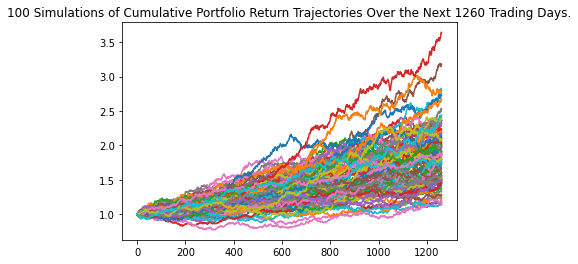

In [25]:
# Plot simulation outcomes
line_plot_TE_MC_5_years = TE_MC_5_years.plot_simulation()

# Save the plot for future usage
line_plot_TE_MC_5_years.get_figure().savefig("TE_MC_5_years_sim_plot.png", bbox_inches="tight")

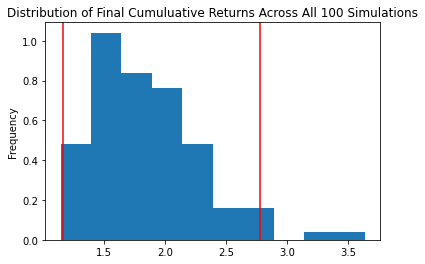

In [26]:
# Plot probability distribution and confidence intervals
dist_plot_TE_MC_5_years = TE_MC_5_years.plot_distribution()

# Save the plot for future usage
dist_plot_TE_MC_5_years.get_figure().savefig('TE_MC_5_years_dist_plot.png',bbox_inches='tight')

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = TE_MC_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           100.000000
mean              1.846492
std               0.450805
min               1.141921
25%               1.513442
50%               1.798282
75%               2.100938
max               3.640368
95% CI Lower      1.161824
95% CI Upper      2.777203
Name: 1260, dtype: float64


In [28]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_TE_MC_5_years_lower = round(tbl2[8]*10000,2)
ci_TE_MC_5_years_upper = round(tbl2[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_TE_MC_5_years_lower} and ${ci_TE_MC_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $11618.24 and $27772.03


#### WEIGHTED BY Dividend Yield

In [29]:
# Configuring a Monte Carlo simulation to forecast 20 years cumulative returns WEIGHTED BY Dividend Yield
TE_DY_5_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [0.19, 0.10, 0.15, 0.09, 0.23, 0.05, 0.19],
    num_simulation = 100,
    num_trading_days = 252*5)

In [30]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
TE_DY_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998331,0.994767,0.993435,1.001556,1.011280,0.991118,1.000343,1.004496,1.000964,1.001758,...,1.000888,1.001070,0.996641,1.002174,0.989293,1.002618,0.995574,1.003233,1.002523,0.996431
2,0.996603,0.996240,0.992739,1.006167,1.007186,0.985512,1.002119,1.001222,0.997885,1.010672,...,0.997527,1.007723,0.993297,1.002363,0.989223,1.013811,0.993007,1.007505,1.007023,1.007042
3,0.995130,0.991206,0.996346,1.000445,1.012918,0.989859,1.007027,1.002297,1.003599,1.015181,...,0.994081,1.013760,0.995141,1.006525,0.988465,1.018475,0.995295,1.015212,1.007572,1.006715
4,0.996085,0.995776,1.002912,1.006786,1.019831,0.993345,1.014332,1.001100,0.994563,1.019823,...,0.995659,1.008068,0.990625,0.998341,0.992292,1.024426,1.001546,1.021201,1.007491,1.015639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.086549,2.115466,2.858658,2.247882,2.764717,2.602383,3.025636,3.046272,1.820126,2.704720,...,2.336443,3.839509,3.133855,3.166748,1.797318,2.223496,2.255051,2.933165,2.017557,1.644742
1257,3.087438,2.108228,2.853708,2.261170,2.805002,2.642314,3.018084,3.055566,1.835767,2.709677,...,2.347075,3.841827,3.134227,3.174238,1.788608,2.216799,2.258295,2.947592,2.008718,1.632777
1258,3.109536,2.106223,2.847246,2.243307,2.782720,2.658208,3.045625,3.087220,1.847121,2.718481,...,2.386342,3.821903,3.137620,3.197490,1.797556,2.233901,2.246424,2.963883,2.018541,1.620736
1259,3.121375,2.105181,2.851483,2.261647,2.781792,2.672004,3.029363,3.090714,1.844497,2.721649,...,2.386771,3.821499,3.136927,3.208146,1.807888,2.239323,2.238580,2.952766,2.023143,1.620540


In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2DY = TE_DY_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl2DY)

count           100.000000
mean              2.568432
std               0.489236
min               1.618951
25%               2.186442
50%               2.539323
75%               2.936003
max               3.823495
95% CI Lower      1.810864
95% CI Upper      3.465020
Name: 1260, dtype: float64


In [32]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_TE_DY_5_years_lower = round(tbl2DY[8]*10000,2)
ci_TE_DY_5_years_upper = round(tbl2DY[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_TE_DY_5_years_lower} and ${ci_TE_DY_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $18108.64 and $34650.2


#### WEIGHTED BY 5 years Return

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns WEIGHTED BY 10 years Return
TE_Ret_5_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [0.06, 0.13, 0.12, 0.06, 0.31, 0.24, 0.08],
    num_simulation = 100,
    num_trading_days = 252*5)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
TE_Ret_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993729,0.984572,1.005739,1.003559,0.998529,0.992918,1.011237,1.019959,0.984579,1.002625,...,0.996568,1.002764,1.009308,0.993933,0.999029,0.999242,1.015073,0.993789,0.999642,1.004612
2,0.995394,0.986929,1.003758,1.002858,0.989036,1.004125,1.017288,1.021094,0.994396,1.016190,...,0.998159,1.009832,1.009566,0.995721,0.993174,0.995824,1.019639,0.994916,0.999401,1.002022
3,0.998739,0.985281,1.007592,0.998522,0.987769,1.010106,1.014179,1.014438,0.989647,1.029266,...,1.007364,1.015218,1.000375,0.997186,0.990608,0.989982,1.018955,1.001987,1.005295,1.000333
4,0.995809,0.988969,1.004247,1.003666,0.982493,1.006575,1.015718,1.005182,0.996584,1.045683,...,1.013622,1.024100,0.998282,1.011351,0.979906,1.006834,1.019563,0.995385,1.001696,0.999451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.657032,4.808540,4.921634,2.771732,4.212429,3.455662,7.728967,4.275378,5.578563,5.308308,...,5.995965,3.987805,6.031066,4.948996,5.956335,7.185673,3.313656,5.295463,3.791301,2.821809
1257,3.654862,4.818233,4.967741,2.726116,4.162973,3.491179,7.668244,4.264519,5.645225,5.359748,...,6.081735,4.002079,6.016761,4.998099,5.972349,7.210005,3.315524,5.295554,3.744310,2.838835
1258,3.638897,4.849492,4.956840,2.717800,4.212051,3.492731,7.863531,4.247109,5.613723,5.334749,...,6.120921,3.994302,6.031548,5.030300,5.937151,7.276539,3.343236,5.339921,3.749127,2.832914
1259,3.682856,4.849200,4.948563,2.707318,4.188053,3.470797,7.957779,4.262245,5.636259,5.284711,...,6.065132,3.996431,6.025055,5.011194,5.995691,7.387450,3.370417,5.356543,3.772068,2.860734


In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2Ret = TE_Ret_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl2Ret)

count           100.000000
mean              4.504054
std               1.179261
min               2.008046
25%               3.611637
50%               4.312858
75%               5.187798
max               7.959179
95% CI Lower      2.769115
95% CI Upper      7.256244
Name: 1260, dtype: float64


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_TE_Ret_5_years_lower = round(tbl2Ret[8]*10000,2)
ci_TE_Ret_5_years_upper = round(tbl2Ret[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_TE_Ret_5_years_lower} and ${ci_TE_Ret_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $27691.15 and $72562.44


## ---------------------------------------------------------------------

### Get Past 15 Year's Worth of Traditional Energy Stock Price Data via Alpaca API Call

In [37]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
TE_MC_15_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [0.12, 0.10, 0.27, 0.09, 0.03, 0.05, 0.34],
    num_simulation = 100,
    num_trading_days = 252*15)

In [38]:
# Printing the simulation input data
TE_MC_15_years.portfolio_data

BP                                      \
                            open     high      low    close   volume   
time                                                                   
2019-08-09 00:00:00-04:00  36.93  37.1100  36.7500  36.8100  6573170   
2019-08-12 00:00:00-04:00  36.86  36.9400  36.5800  36.6700  5532312   
2019-08-13 00:00:00-04:00  36.60  37.3400  36.5200  37.2000  9266687   
2019-08-14 00:00:00-04:00  36.42  36.5348  36.1500  36.2501  9905228   
2019-08-15 00:00:00-04:00  35.92  36.0900  35.7251  36.0500  8085528   
...                          ...      ...      ...      ...      ...   
2019-12-24 00:00:00-05:00  37.97  38.1400  37.9600  38.0500  2200308   
2019-12-26 00:00:00-05:00  38.06  38.2000  37.9400  37.9800  4341802   
2019-12-27 00:00:00-05:00  38.24  38.2500  37.8700  37.8700  4932689   
2019-12-30 00:00:00-05:00  37.80  37.9680  37.5700  37.6000  5849015   
2019-12-31 00:00:00-05:00  37.42  37.7400  37.3301  37.7400  5083063   

                                          COP                         ...  \
                          daily_return   open     high    low  close  ...   
time                                                                  ...   
2019-08-09 00:00:00-04:00          NaN  54.96  55.4700  53.98  54.01  ...   
2019-08-12 00:00:00-04:00    -0.003803  53.79  53.9300  52.85  53.12  ...   
2019-08-13 00:00:00-04:00     0.014453  52.84  54.8300  52.44  53.87  ...   
2019-08-14 00:00:00-04:00    -0.025535  52.46  52.8600  51.52  51.79  ...   
2019-08-15 00:00:00-04:00    -0.005520  51.40  52.0100  50.59  50.91  ...   
...                                ...    ...      ...    ...    ...  ...   
2019-12-24 00:00:00-05:00    -0.001312  64.76  65.5100  64.61  64.71  ...   
2019-12-26 00:00:00-05:00    -0.001840  65.09  65.7359  64.85  65.03  ...   
2019-12-27 00:00:00-05:00    -0.002896  65.20  65.6300  64.61  65.01  ...   
2019-12-30 00:00:00-05:00    -0.007130  65.07  65.2500  64.53  64.62  ...   
2019-12-31 00:00:00-05:00     0.003723  64.15  65.1700  63.90  65.01  ...   

                              PXD                                  XOM  \
                              low   close   volume daily_return   open   
time                                                                     
2019-08-09 00:00:00-04:00  124.86  126.24  1240740          NaN  72.13   
2019-08-12 00:00:00-04:00  124.21  126.79  1426932     0.004357  70.06   
2019-08-13 00:00:00-04:00  125.08  128.38  1560585     0.012540  69.27   
2019-08-14 00:00:00-04:00  122.50  122.72  1641303    -0.044088  69.07   
2019-08-15 00:00:00-04:00  120.93  122.97  1060414     0.002037  67.46   
...                           ...     ...      ...          ...    ...   
2019-12-24 00:00:00-05:00  151.05  151.80   347823     0.005564  70.35   
2019-12-26 00:00:00-05:00  151.76  152.12   700815     0.002108  70.19   
2019-12-27 00:00:00-05:00  151.70  151.84   778671    -0.001841  70.20   
2019-12-30 00:00:00-05:00  150.25  150.87  1076110    -0.006388  70.09   
2019-12-31 00:00:00-05:00  149.16  151.33   834722     0.003049  69.02   

                                                                           
                              high      low  close    volume daily_return  
time                                                                       
2019-08-09 00:00:00-04:00  72.2500  70.4700  70.84  11314943          NaN  
2019-08-12 00:00:00-04:00  70.1600  69.3300  69.61   7976201    -0.017363  
2019-08-13 00:00:00-04:00  70.6200  68.9200  70.48  10164978     0.012498  
2019-08-14 00:00:00-04:00  69.0900  67.6500  67.66  14897131    -0.040011  
2019-08-15 00:00:00-04:00  67.5550  66.5250  67.25  10962122    -0.006060  
...                            ...      ...    ...       ...          ...  
2019-12-24 00:00:00-05:00  70.5000  69.9101  70.02   3650368    -0.003841  
2019-12-26 00:00:00-05:00  70.5000  70.0100  70.13   6831328     0.001571  
2019-12-27 00:00:00-05:00  70.3123  69.8800  69.89   7459006    -0.00

In [39]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
TE_MC_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002671,0.992338,0.998291,1.004601,1.009720,0.991913,0.992008,0.993196,1.011916,0.995584,...,1.000135,0.991793,1.000961,0.999750,1.009301,0.995962,0.999334,0.996648,0.999420,1.007847
2,1.007366,0.998264,1.004142,0.995547,1.005589,0.993644,0.993163,0.992407,1.009937,1.007899,...,0.993476,0.988881,0.995610,0.998219,1.003947,1.001710,0.998419,0.988161,1.003396,0.997038
3,1.009397,1.006856,1.009005,0.999837,1.017459,0.988565,0.993965,1.002723,1.013517,1.003700,...,1.002050,0.997966,0.998674,1.005740,1.002825,0.998627,0.992176,0.991357,1.009870,0.988233
4,1.005373,1.004928,0.998430,1.000049,1.009557,0.972900,0.991425,1.011807,1.011935,1.007552,...,1.006260,0.987812,1.000405,0.995102,1.006259,1.005017,0.987024,1.001230,1.011700,0.991866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,5.679929,3.948437,4.531667,6.544583,3.813147,9.670215,7.668704,8.743775,7.015074,4.612303,...,3.230580,9.058004,7.626989,5.747574,6.822636,5.856240,2.847128,6.459928,9.232074,4.830317
3777,5.686605,3.928788,4.519781,6.488459,3.854923,9.764243,7.538729,8.800915,7.084190,4.599505,...,3.222928,9.062136,7.589117,5.731161,6.810037,5.840914,2.848847,6.404292,9.266584,4.853513
3778,5.734218,3.965249,4.579591,6.501871,3.878252,9.739111,7.618273,8.814967,7.057887,4.591833,...,3.214958,9.073521,7.655597,5.720010,6.771495,5.930776,2.868717,6.404513,9.377135,4.857983
3779,5.744710,3.984532,4.569859,6.583019,3.841186,9.759029,7.624533,8.847395,7.060617,4.590085,...,3.270972,9.012073,7.654131,5.673695,6.770189,5.974747,2.870161,6.414540,9.287334,4.883574


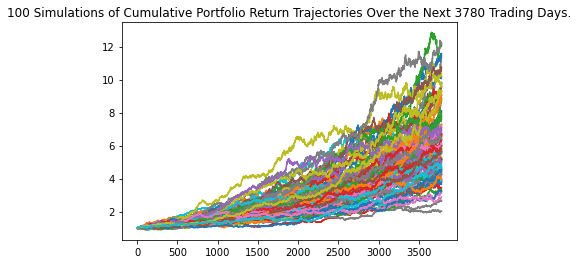

In [40]:
# Plot simulation outcomes
line_plot_TE_MC_15_years = TE_MC_15_years.plot_simulation()

# Save the plot for future usage
line_plot_TE_MC_15_years.get_figure().savefig("TE_MC_15_years_sim_plot.png", bbox_inches="tight")

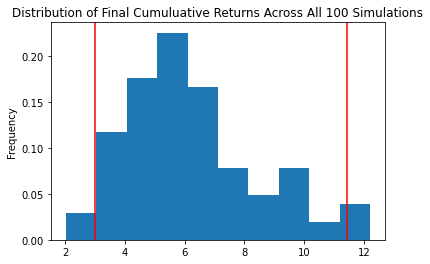

In [41]:
# Plot probability distribution and confidence intervals
dist_plot_TE_MC_15_years = TE_MC_15_years.plot_distribution()

# Save the plot for future usage
dist_plot_TE_MC_15_years.get_figure().savefig('TE_MC_15_years_dist_plot.png',bbox_inches='tight')

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = TE_MC_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           100.000000
mean              6.273429
std               2.240297
min               2.020878
25%               4.602222
50%               5.812387
75%               7.373974
max              12.210423
95% CI Lower      3.014293
95% CI Upper     11.449445
Name: 3780, dtype: float64


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TraditionalEnergy Portfolio
ci_TE_MC_15_years_lower = round(tbl3[8]*10000,2)
ci_TE_MC_15_years_upper = round(tbl3[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_TE_MC_15_years_lower} and ${ci_TE_MC_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 15 years will end within in the range of $30142.93 and $114494.45


#### WEIGHTED BY Dividend Yield

In [44]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns WEIGHTED BY Dividend Yield
TE_DY_15_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [0.19, 0.10, 0.15, 0.09, 0.23, 0.05, 0.19],
    num_simulation = 100,
    num_trading_days = 252*15)

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
TE_DY_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998084,1.000014,1.010423,1.003773,0.987689,0.999310,1.001421,0.992657,0.997226,1.005243,...,1.000465,0.998232,1.003604,0.990629,0.999049,1.008555,0.999983,0.992070,0.996885,0.990634
2,1.001464,0.998910,1.011507,0.997326,0.990412,1.004793,0.999192,0.989336,1.003459,1.008291,...,1.012420,0.987758,0.989996,0.991815,1.005204,1.012361,0.999860,0.988707,0.999920,1.000124
3,1.003193,0.997941,1.004645,0.997081,0.995170,1.002318,0.997666,0.988441,1.014287,1.003353,...,1.012592,0.983390,0.982712,0.991479,1.007493,1.007435,1.013527,0.995623,0.995264,1.005901
4,1.008898,0.993846,1.016537,1.004666,1.001551,1.000947,0.990890,0.994386,1.009946,1.000743,...,1.012427,0.983395,0.980660,0.989625,1.012399,1.005589,1.013849,0.990192,1.004127,1.012672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,23.015135,11.653947,13.598502,11.790357,12.964419,13.167406,17.258843,24.610542,16.976296,11.479161,...,10.415354,17.096430,16.761374,10.907662,9.398166,21.801407,22.475311,13.583381,14.977871,14.898548
3777,22.816235,11.486404,13.601427,11.835602,13.120718,13.202706,17.183009,24.533750,16.989214,11.502254,...,10.412693,17.064170,16.784024,10.930058,9.447178,21.610575,22.329239,13.545511,14.976547,14.936955
3778,22.919879,11.516938,13.733756,11.816064,13.097556,13.348434,17.364199,24.495726,17.088199,11.506549,...,10.407715,16.911133,16.775375,10.888074,9.491739,21.588519,22.333297,13.532806,14.932001,14.968511
3779,23.106658,11.442595,13.733046,11.752645,13.029477,13.306914,17.263034,24.511522,17.137864,11.525741,...,10.565119,16.831338,16.836120,10.940402,9.447800,21.543910,22.189704,13.448844,14.915016,15.053713


In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3DY = TE_DY_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl3DY)

count           100.000000
mean             15.822965
std               4.249733
min               8.709615
25%              12.460621
50%              15.003930
75%              18.110947
max              25.763729
95% CI Lower      9.523352
95% CI Upper     25.483175
Name: 3780, dtype: float64


In [47]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_TE_DY_15_years_lower = round(tbl3DY[8]*10000,2)
ci_TE_DY_15_years_upper = round(tbl3DY[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_TE_DY_15_years_lower} and ${ci_TE_DY_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 15 years will end within in the range of $95233.52 and $254831.75


#### WEIGHTED BY 15 years Return

In [48]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns WEIGHTED BY 15 years Return
TE_Ret_15_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [0.06, 0.13, 0.12, 0.06, 0.31, 0.24, 0.08],
    num_simulation = 100,
    num_trading_days = 252*15)

In [49]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
TE_Ret_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009577,0.996373,1.000471,1.004205,0.997062,1.008456,1.007101,1.008051,0.995413,1.007065,...,1.007014,0.995295,1.000192,1.004591,0.994524,0.994503,1.011829,1.005122,1.009882,1.002104
2,1.005749,1.007092,0.996696,1.013340,0.994820,0.993045,1.011199,1.027729,1.002353,0.997361,...,1.004028,1.001137,1.001605,1.008119,0.997170,1.010701,1.019285,1.008207,0.990838,1.001090
3,1.014693,1.015877,0.986431,1.018009,0.996525,0.996160,1.008097,1.028666,1.000103,0.996796,...,1.011558,1.004193,0.996178,1.006646,1.005699,1.026581,1.018433,0.998678,0.979296,0.999246
4,1.019585,1.019550,0.987142,1.025002,1.000539,0.990458,1.002932,1.020385,0.999997,0.991887,...,1.013908,1.004095,0.994382,0.990380,1.007171,1.031253,1.026198,0.998905,0.988038,0.996961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,128.328561,107.683798,78.463197,140.857405,36.596074,53.861691,51.302900,110.547809,72.300458,88.216437,...,99.885372,68.157383,57.445143,70.351239,67.435135,59.009207,96.206310,64.895875,67.053566,57.175619
3777,126.778505,107.932699,78.627068,139.460517,36.639859,53.801713,51.852996,110.898118,72.404816,87.417755,...,101.466798,68.564740,57.443030,70.014708,67.509202,59.041322,96.987230,64.557700,67.475566,57.896729
3778,126.029762,108.123268,77.709688,139.698584,36.462951,53.332187,51.423114,110.255435,72.013352,88.159357,...,101.306576,68.320324,57.704994,70.368861,67.429476,59.059070,96.715650,64.151837,66.802868,57.967500
3779,126.740519,108.427446,77.372876,138.727018,36.191831,53.420082,51.315323,110.145071,71.233236,88.221391,...,102.627077,68.449461,58.266925,71.043272,67.708496,58.708247,97.227761,64.501228,66.843462,57.879188


In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3Ret = TE_Ret_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl3Ret)

count           100.000000
mean             86.686766
std              34.824194
min              32.806356
25%              60.100345
50%              78.554650
75%             104.673283
max             204.090610
95% CI Lower     37.642330
95% CI Upper    164.677354
Name: 3780, dtype: float64


In [51]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_TE_Ret_15_years_lower = round(tbl3Ret[8]*10000,2)
ci_TE_Ret_15_years_upper = round(tbl3Ret[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_TE_Ret_15_years_lower} and ${ci_TE_Ret_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 15 years will end within in the range of $376423.3 and $1646773.54


### Simulate 5, 10 and 15 years portfolio growth using Monte Carlo simulation, weighted iqualy

#### MonteCarlo 10 Years simulation

In [52]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns 
TE_10_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7],
    num_simulation = 100,
    num_trading_days = 252*10)

In [53]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
TE_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998312,0.995010,1.001227,0.998977,1.004823,1.003831,1.000461,1.001329,0.998945,0.998708,...,1.006341,0.993695,1.002293,1.002047,0.999647,0.998147,0.997659,1.003041,1.014993,1.001154
2,1.000620,1.000689,1.013436,1.005490,1.009616,1.007665,1.009248,1.002229,0.995722,1.001797,...,1.011094,0.980482,1.004927,1.007500,1.005241,0.998083,0.993364,1.011056,1.018902,1.001336
3,0.994808,1.002784,1.021045,0.999421,1.017866,1.012122,1.016178,1.011378,0.997084,0.999549,...,1.020990,0.991637,1.015746,1.001870,1.006765,0.990255,0.991187,1.020126,1.013345,1.002701
4,0.997162,1.002572,1.025678,0.990838,1.020280,1.016207,1.019324,1.008760,0.994766,1.003876,...,1.016878,0.994565,1.020800,1.004009,1.014217,1.006714,0.987509,1.028647,1.031518,1.007912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,9.537050,13.066354,9.604253,7.526476,12.125200,16.095874,16.154569,10.782349,25.488205,17.830719,...,18.882689,15.172397,4.976372,11.751246,19.566859,7.164200,8.653836,10.723394,11.602830,15.992047
2517,9.494919,13.101118,9.611302,7.509909,12.109264,16.005853,16.233208,10.817635,25.793288,17.806273,...,18.889892,14.997493,4.986016,11.754600,19.670212,7.252171,8.638794,10.720868,11.575837,16.238207
2518,9.646178,13.123409,9.667225,7.541490,12.092963,16.055345,16.115522,10.788545,25.845878,17.687098,...,19.018343,14.997282,4.956674,11.698722,19.686581,7.321866,8.698873,10.691487,11.576015,16.111207
2519,9.673600,13.102659,9.585454,7.499235,12.106800,16.138523,16.157248,10.837729,25.968219,17.649937,...,19.227787,14.928417,4.983300,11.628552,19.706686,7.355930,8.616643,10.703487,11.567545,16.226649


In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1TE = TE_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_1TE)

count           100.000000
mean             13.054810
std               3.858476
min               4.016016
25%              10.438786
50%              12.839152
75%              15.517473
max              26.035667
95% CI Lower      6.707243
95% CI Upper     20.213000
Name: 2520, dtype: float64


In [55]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_TE_10_years_lower = round(tbl_1TE[8]*10000,2)
ci_TE_10_years_upper = round(tbl_1TE[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_TE_10_years_lower} and ${ci_TE_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $67072.43 and $202130.0


#### MonteCarlo 5 Years simulation

In [56]:
# Configuring a Monte Carlo simulation to forecast 20 years cumulative returns 
TE_5_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7],
    num_simulation = 100,
    num_trading_days = 252*5)

In [57]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
TE_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000399,1.001867,1.006007,1.010390,1.003051,0.993831,0.994094,1.002142,1.000483,0.997430,...,0.996261,1.003852,1.001021,0.995555,0.994549,1.001187,1.008951,0.996701,0.993976,0.993468
2,0.998942,1.002053,1.010498,1.008993,1.009268,0.991812,0.991690,0.995784,0.991898,0.994043,...,1.008323,1.003246,1.018599,1.004130,1.000448,0.994291,1.015963,0.997485,1.001192,0.992140
3,1.005085,0.994314,1.017215,1.011843,1.019627,0.992638,0.994355,0.994462,0.991431,0.997754,...,1.010052,1.011950,1.020572,1.009569,1.009455,0.990655,1.022987,0.996646,0.998896,0.995616
4,1.008391,1.001061,1.019781,1.005464,1.018242,1.000021,0.996930,0.999460,0.988806,0.996111,...,1.011765,1.013735,1.018453,0.995036,0.996409,0.998540,1.011328,0.993794,0.992967,1.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.349114,3.383007,4.344313,4.061013,4.058471,3.512566,3.426098,3.050340,3.398172,2.815698,...,4.501823,5.027068,3.948514,3.025719,3.420045,3.002022,3.770884,3.724074,5.749665,6.325977
1257,4.313521,3.367916,4.383025,4.036307,4.037905,3.544995,3.435112,3.045233,3.403756,2.818152,...,4.518353,5.052237,3.949319,3.012529,3.415529,3.018925,3.743685,3.741942,5.752093,6.320810
1258,4.305405,3.357494,4.398715,4.063323,4.078621,3.511240,3.467828,3.057021,3.396067,2.840451,...,4.546415,5.089198,3.967288,2.991381,3.379970,3.034547,3.749885,3.759468,5.749582,6.305761
1259,4.279044,3.332289,4.387587,4.083878,4.076073,3.522478,3.471189,3.053771,3.398278,2.844851,...,4.565722,5.081654,3.976921,2.990036,3.389759,2.995597,3.789075,3.766166,5.754512,6.321577


In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2TE = TE_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_2TE)

count           100.000000
mean              3.761707
std               0.849594
min               2.230604
25%               3.157207
50%               3.630760
75%               4.285511
max               6.277696
95% CI Lower      2.358078
95% CI Upper      5.669032
Name: 1260, dtype: float64


In [59]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_TE_5_years_lower = round(tbl_2TE[8]*10000,2)
ci_TE_5_years_upper = round(tbl_2TE[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_TE_5_years_lower} and ${ci_TE_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $23580.78 and $56690.32


#### MonteCarlo 15 Years simulation

In [60]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns 
TE_15_years = MCSimulation(
    portfolio_data = trad_energy,
    weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7],
    num_simulation = 100,
    num_trading_days = 252*15)

In [61]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
TE_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991598,1.006340,0.999209,1.003581,0.997389,0.994897,0.999408,1.005940,0.998076,1.007880,...,1.007079,1.004428,0.996547,1.003401,1.000890,1.010326,1.010246,1.006846,0.995477,0.995110
2,0.996322,1.016266,0.996227,1.007155,0.997707,0.998707,1.006075,0.994511,1.005048,1.013051,...,1.005503,1.003521,1.001989,1.004533,1.005128,1.000775,1.015106,1.015308,0.993815,0.993183
3,1.012931,1.014474,0.989659,1.014563,1.000244,1.000967,1.006017,0.993577,1.015531,1.001466,...,0.994243,1.005356,1.002357,1.001064,1.009072,1.014390,1.015654,1.015594,0.997067,0.994204
4,1.012250,1.016622,1.005088,1.009728,0.994748,0.994121,1.010746,0.996866,1.019400,1.000085,...,0.997765,1.003757,0.999209,1.006646,1.006557,1.018031,1.014616,1.016024,0.996075,0.992448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,45.176056,68.703958,28.587157,37.505661,48.252584,64.515671,27.701955,44.451924,24.290264,39.595802,...,56.233303,35.917127,72.353587,54.241508,26.279550,69.537392,51.168036,29.471556,35.074245,83.988529
3777,45.255705,69.177711,28.224589,37.495269,48.349963,64.487595,27.660870,44.161602,24.225397,39.498193,...,56.952328,35.681656,73.029000,54.311454,26.293616,68.795515,51.259303,29.322847,35.020909,84.570497
3778,45.426695,69.618005,28.409486,37.479179,47.941038,64.497273,27.811218,44.555624,24.103465,39.351767,...,57.025539,35.743742,72.420760,54.740548,26.277506,68.744131,50.991088,29.049984,35.139898,83.940792
3779,45.436650,69.066015,28.255490,37.836082,48.146166,64.696033,28.146803,44.345737,24.068124,38.959124,...,57.114508,35.651240,72.106716,54.737639,26.195888,69.118922,50.383314,29.066786,35.328841,84.281270


In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3TE = TE_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_3TE)

count           100.000000
mean             46.262906
std              17.543290
min              21.057242
25%              33.862378
50%              43.483504
75%              53.362490
max             130.820410
95% CI Lower     23.598403
95% CI Upper     89.176793
Name: 3780, dtype: float64


In [63]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_TE_15_years_lower = round(tbl_3TE[8]*10000,2)
ci_TE_15_years_upper = round(tbl_3TE[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_TE_15_years_lower} and ${ci_TE_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 15 years will end within in the range of $235984.03 and $891767.93


### S&P 500 Simulate 5, 10 and 15 years portfolio growth using Monte Carlo simulation, weighted iqualy

In [64]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2010-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ['SPY']

# Get 10 year's worth of historical price data 
SPY = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
SPY.head()

SPY                                     
                             open      high     low   close     volume
time                                                                  
2019-08-09 00:00:00-04:00  292.58  293.2400  289.65  291.59   79060953
2019-08-12 00:00:00-04:00  289.96  291.6052  287.02  288.10   55499992
2019-08-13 00:00:00-04:00  287.74  294.1500  287.36  292.43   82355835
2019-08-14 00:00:00-04:00  288.07  292.4644  283.76  283.92  114406673
2019-08-15 00:00:00-04:00  284.88  285.6400  282.39  284.69   82311442

In [65]:
SPY.isnull().sum()

SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [66]:
SPY.dropna()

SPY                                     
                             open      high     low   close     volume
time                                                                  
2019-08-09 00:00:00-04:00  292.58  293.2400  289.65  291.59   79060953
2019-08-12 00:00:00-04:00  289.96  291.6052  287.02  288.10   55499992
2019-08-13 00:00:00-04:00  287.74  294.1500  287.36  292.43   82355835
2019-08-14 00:00:00-04:00  288.07  292.4644  283.76  283.92  114406673
2019-08-15 00:00:00-04:00  284.88  285.6400  282.39  284.69   82311442
...                           ...       ...     ...     ...        ...
2019-12-24 00:00:00-05:00  321.47  321.5200  320.90  321.26   16067681
2019-12-26 00:00:00-05:00  321.65  322.9300  321.64  322.91   27114092
2019-12-27 00:00:00-05:00  323.74  323.8000  322.28  322.86   35123062
2019-12-30 00:00:00-05:00  322.95  323.1000  320.55  321.10   41848090
2019-12-31 00:00:00-05:00  320.53  322.1300  320.15  321.89   38134256

[100 rows x 5 columns]

#### MonteCarlo 10 Years simulation

In [67]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns 
SPY_10_years = MCSimulation(
    portfolio_data = SPY,
    num_simulation = 100,
    num_trading_days = 252*10)

In [68]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
SPY_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014580,1.001122,0.987650,1.009225,0.998452,1.002627,0.984893,0.994762,0.989710,1.021470,...,1.006566,1.010309,1.004258,1.002730,1.000876,1.009108,1.005630,0.995347,1.001496,1.005663
2,1.025018,0.996910,1.000496,1.007734,0.999066,0.996705,0.984665,0.997901,1.003838,1.017627,...,1.003362,1.012923,1.004644,1.002825,1.000063,1.007213,1.009911,1.004880,1.010025,1.006791
3,1.016190,0.998274,1.003137,1.017185,0.997834,0.992167,0.983142,0.989037,1.010628,1.005712,...,1.005591,1.009505,1.013177,1.008872,0.998742,0.999562,0.998526,1.008431,1.003683,1.014018
4,1.019754,0.999193,1.007622,1.013250,1.003614,1.002128,0.983433,0.993555,1.014524,1.015696,...,1.004561,1.023270,1.013138,1.004628,0.999451,1.008260,0.991635,1.013103,1.014268,1.021817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,8.565870,17.405040,4.690810,14.488056,11.268213,20.242411,15.099134,13.423584,15.121717,12.605880,...,11.889468,23.590909,11.855601,14.047798,12.234676,9.971775,10.686486,10.214386,13.021034,12.240627
2517,8.524069,17.381828,4.682676,14.337568,11.349094,20.200732,15.196119,13.428533,15.129337,12.548783,...,11.804071,23.681655,11.803862,14.121869,12.216534,9.996408,10.741854,10.243771,13.195841,12.159486
2518,8.524615,17.592803,4.724205,14.212070,11.498303,20.016176,15.242209,13.374637,15.137888,12.719538,...,11.843566,23.597004,11.801076,14.152427,12.330493,10.044327,10.787712,10.287993,13.076874,12.114336
2519,8.501596,17.702445,4.732616,14.369392,11.461232,19.764472,15.175028,13.437885,15.267712,12.676496,...,11.915017,23.905031,11.753038,14.277753,12.271609,10.022778,10.873760,10.347568,12.975084,12.232947


In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1SPY_10_years = SPY_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_1SPY_10_years)

count           100.000000
mean             13.949992
std               4.690429
min               4.773907
25%              10.581901
50%              13.390279
75%              16.430498
max              27.325951
95% CI Lower      7.530568
95% CI Upper     24.965375
Name: 2520, dtype: float64


In [70]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_SPY_10_years_lower = round(tbl_1SPY_10_years[8]*10000,2)
ci_SPY_10_years_upper = round(tbl_1SPY_10_years[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_SPY_10_years_lower} and ${ci_SPY_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $75305.68 and $249653.75


#### MonteCarlo 5 Years simulation

In [71]:
# Configuring a Monte Carlo simulation to forecast 20 years cumulative returns 
SPY_5_years = MCSimulation(
    portfolio_data = SPY,
    num_simulation = 100,
    num_trading_days = 252*5)

In [72]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
SPY_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005732,0.988393,1.001455,1.004030,0.994747,1.011854,1.000832,0.994879,0.994953,1.005237,...,0.981516,1.000765,0.995502,0.994610,1.008691,1.000242,1.005262,1.003592,0.996183,0.998811
2,1.003248,0.991283,1.002551,1.004912,0.991273,1.007338,0.999707,0.989149,0.986248,1.010844,...,0.983386,0.999269,0.991927,0.999223,1.005039,1.000679,1.011751,1.000523,1.009152,0.986777
3,1.007879,0.999233,0.989676,1.019023,0.983194,1.017900,1.007744,0.985680,0.998231,1.018546,...,0.978720,1.009073,0.989972,0.994949,1.010875,0.992381,1.024243,1.008862,1.007385,0.986834
4,1.015254,0.998241,0.991610,1.016710,0.985081,1.009816,1.007449,0.996148,1.002962,1.019600,...,0.968549,1.009823,0.984475,0.988186,1.021979,0.999912,1.026273,1.002937,1.014517,0.991404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.700462,2.892963,3.568105,2.880994,3.621252,2.601652,2.599119,3.392231,4.209576,3.173395,...,3.761877,3.164323,1.803039,2.276657,3.962966,6.606172,3.475271,2.059812,3.426752,2.811646
1257,3.683062,2.875258,3.570098,2.886001,3.604246,2.588693,2.605289,3.428194,4.177130,3.175472,...,3.799981,3.151738,1.802759,2.299270,3.976676,6.549238,3.481662,2.033595,3.407775,2.833569
1258,3.670005,2.919812,3.585555,2.892869,3.626314,2.596374,2.624474,3.460698,4.136327,3.172268,...,3.835777,3.195463,1.809083,2.305951,3.976479,6.572089,3.497440,2.006281,3.430880,2.863557
1259,3.689183,2.895272,3.599482,2.921867,3.573744,2.596368,2.611866,3.433570,4.131866,3.129364,...,3.835249,3.182867,1.827755,2.303626,3.982825,6.656023,3.462397,1.985868,3.434934,2.850238


In [73]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2SPY_5_years = SPY_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_2SPY_5_years)

count           100.000000
mean              3.530368
std               1.124880
min               1.682326
25%               2.783058
50%               3.432513
75%               4.126607
max               8.809087
95% CI Lower      1.900065
95% CI Upper      6.172347
Name: 1260, dtype: float64


In [74]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_SPY_5_years_lower = round(tbl_2SPY_5_years[8]*10000,2)
ci_SPY_5_years_upper = round(tbl_2SPY_5_years[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_SPY_5_years_lower} and ${ci_SPY_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $19000.65 and $61723.47


#### MonteCarlo 15 Years simulation

In [75]:
# Configuring a Monte Carlo simulation to forecast 20 years cumulative returns 
SPY_15_years = MCSimulation(
    portfolio_data = SPY,
    num_simulation = 100,
    num_trading_days = 252*15)

In [76]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
SPY_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010968,1.000124,0.999525,1.010464,1.002892,0.993736,0.985321,0.998848,1.007952,1.015887,...,0.994014,1.009946,1.002694,0.995052,1.008562,0.989484,1.002085,1.013855,0.999937,1.003706
2,1.010609,1.006378,1.010704,1.008461,0.994056,0.997486,0.992120,0.989222,1.010606,1.016745,...,0.996267,1.007339,0.999796,0.995081,1.020913,0.993084,0.995821,1.001980,1.004308,1.005618
3,1.023899,1.009592,1.000586,1.018161,0.999126,0.994960,0.996623,0.978547,1.015388,1.011540,...,0.998285,1.009042,1.006746,1.003439,1.030697,0.998427,0.994253,0.999870,1.004419,0.998314
4,1.024365,1.011572,1.001118,1.025984,1.011205,0.993123,0.988628,0.968420,1.020264,1.016379,...,0.991487,1.022692,1.010363,1.005518,1.026894,0.998708,0.998538,0.996408,1.001080,0.981368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,35.579371,23.314422,76.500322,87.890770,40.862599,65.867768,25.728012,57.857417,13.670221,26.452223,...,44.261484,28.233119,45.052225,59.697034,50.096668,61.076000,53.180078,66.688704,58.945085,32.964544
3777,35.600380,23.279572,76.334485,87.600945,41.329088,66.192811,25.855175,57.393617,13.621608,26.713297,...,44.636324,28.145030,44.756680,59.580701,49.439589,61.886844,52.914518,66.926690,58.965954,33.091756
3778,35.899595,23.221905,76.682028,87.165157,41.687479,66.272976,25.795308,57.142344,13.445025,26.589112,...,44.774935,27.848385,44.662676,59.796831,49.314026,62.266860,52.515700,66.502890,59.383148,32.769356
3779,35.976165,23.454298,76.620304,87.552007,41.735559,66.559559,25.839375,57.507298,13.450614,26.784274,...,45.143822,27.349471,44.538374,59.687136,49.464082,63.218433,52.844273,67.213357,59.390790,32.719882


In [77]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3SPY_15_years = SPY_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_3SPY_15_years)

count           100.000000
mean             47.515494
std              20.946354
min              13.498693
25%              31.653892
50%              43.340122
75%              59.976223
max             117.277967
95% CI Lower     18.009290
95% CI Upper     89.976980
Name: 3780, dtype: float64


In [78]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_SPY_15_years_lower = round(tbl_3SPY_15_years[8]*10000,2)
ci_SPY_15_years_upper = round(tbl_3SPY_15_years[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_SPY_15_years_lower} and ${ci_SPY_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 15 years will end within in the range of $180092.9 and $899769.8


# Sumary

#### The Monte Carlo forecast brings a Lover and Upper 95% confidence intervals showing the possible outcomes for an initial investment of USD:10,000 in The Alternative Renewable Energy Portfolio, here you can find 3 sentive models base on Market Capita, Dividend Yield and 10 Years Return, in different lapses:

## 5 / 10 / 15 Years Forecast **Traditional Energy Stocks**

In [79]:
print(f" ** MonteCarlo simulation S&P500")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_SPY_5_years_lower}      and    95% confidence intervals Upper (5 Years) = ${ci_SPY_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_SPY_10_years_lower}     and    95% confidence intervals Upper (10 Years) = ${ci_SPY_10_years_upper}")  
print(f" 95% confidence intervals Lower (15 Years) = ${ci_SPY_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_SPY_15_years_upper}")
print()
print()
print(f" ** MonteCarlo simulation weighted Iqualy")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_TE_5_years_lower}      and    95% confidence intervals Upper (5 Years) = ${ci_TE_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_TE_10_years_lower}     and    95% confidence intervals Upper (10 Years) = ${ci_TE_10_years_upper}")  
print(f" 95% confidence intervals Lower (15 Years) = ${ci_TE_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_TE_15_years_upper}")
print()
print(f" ** MonteCarlo simulation weighted by Stock Market Capital")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_TE_MC_5_years_lower}    and    95% confidence intervals Upper (5 Years) = ${ci_TE_MC_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_TE_MC_10_years_lower}    and    95% confidence intervals Upper (10 Years) = ${ci_TE_MC_10_years_upper}")
print(f" 95% confidence intervals Lower (15 Years) = ${ci_TE_MC_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_TE_MC_15_years_upper}")
print()
print()
print(f" ** MonteCarlo simulation weighted by Stock Dividend Yield")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_TE_DY_5_years_lower}     and    95% confidence intervals Upper (5 Years) = ${ci_TE_DY_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_TE_DY_10_years_lower}    and    95% confidence intervals Upper (10 Years) = ${ci_TE_DY_10_years_upper}")
print(f" 95% confidence intervals Lower (15 Years) = ${ci_TE_DY_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_TE_DY_15_years_upper}")
print()
print()
print(f" ** MonteCarlo simulation weighted by Stock 10 years Cumulated Return")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_TE_Ret_5_years_lower}     and    95% confidence intervals Upper (5 Years) = ${ci_TE_Ret_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_TE_Ret_10_years_lower}    and    95% confidence intervals Upper (10 Years) = ${ci_TE_Ret_10_years_upper}")
print(f" 95% confidence intervals Lower (15 Years) = ${ci_TE_Ret_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_TE_Ret_15_years_upper}")

 ** MonteCarlo simulation S&P500

 95% confidence intervals Lower (5 Years) = $19000.65      and    95% confidence intervals Upper (5 Years) = $61723.47
 95% confidence intervals Lower (10 Years) = $75305.68     and    95% confidence intervals Upper (10 Years) = $249653.75
 95% confidence intervals Lower (15 Years) = $180092.9    and    95% confidence intervals Upper (15 Years) = $899769.8


 ** MonteCarlo simulation weighted Iqualy

 95% confidence intervals Lower (5 Years) = $23580.78      and    95% confidence intervals Upper (5 Years) = $56690.32
 95% confidence intervals Lower (10 Years) = $67072.43     and    95% confidence intervals Upper (10 Years) = $202130.0
 95% confidence intervals Lower (15 Years) = $235984.03    and    95% confidence intervals Upper (15 Years) = $891767.93

 ** MonteCarlo simulation weighted by Stock Market Capital

 95% confidence intervals Lower (5 Years) = $11618.24    and    95% confidence intervals Upper (5 Years) = $27772.03
 95% confidence interval

In [83]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
map_box_api = os.getenv("mapbox")

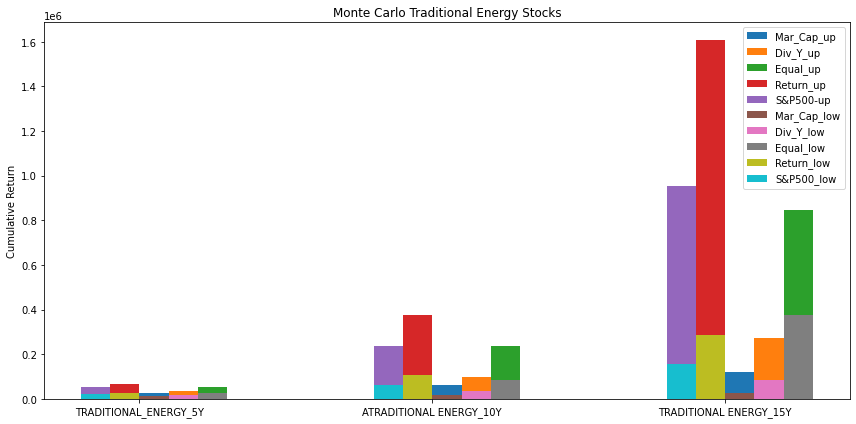

In [87]:
 
labels = ['TRADITIONAL_ENERGY_5Y', 'ATRADITIONAL ENERGY_10Y', 'TRADITIONAL ENERGY_15Y']
Mar_Cap_up =[26783.69, 62665.14, 119915.29]
Mar_Cap_low =[12948.5, 18479.83, 26370.63]
Div_Y_up=[33200.9, 100104.51, 274984.97]
Div_Y_low=[19412.96, 35972.15, 84922.24]
Equal_up=[ 52577.44, 236974.0, 847784.35]
Equal_low=[ci_TE_Ret_5_years_lower, ci_TE_Ret_10_years_lower, ci_TE_Ret_15_years_lower]
Return_up=[68846.43, 375724.94, 1606266.28]
Return_low=[25506.99, 108105.55, 286204.82]
spy_up=[54966.1, 234794.94, 952911.17]
spy_low=[20285.2, 62768.0, 155488.35] 
 

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x + width/2,Mar_Cap_up, width, label='Mar_Cap_up') 
rects2 = ax.bar(x + width*1.5, Div_Y_up, width, label='Div_Y_up')
rects3 = ax.bar(x + width*2.5, Equal_up, width, label='Equal_up')
rects4 = ax.bar(x - width/2, Return_up, width, label='Return_up')
rects5 = ax.bar(x - width*1.5, spy_up, width, label='S&P500-up')
rects6 = ax.bar(x + width/2,Mar_Cap_low, width, label='Mar_Cap_low') 
rects7 = ax.bar(x + width*1.5, Div_Y_low, width, label='Div_Y_low')
rects8 = ax.bar(x + width*2.5, Equal_low, width, label='Equal_low')
rects9 = ax.bar(x - width/2, Return_low, width, label='Return_low')
rects10 = ax.bar(x - width*1.5, spy_low, width, label='S&P500_low')






# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative Return')
ax.set_title('Monte Carlo Traditional Energy Stocks')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show();